In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("..")

In [78]:
from src.data_generator import *
from src.model import *
import numpy as np
import matplotlib.pyplot as plt

In [108]:
X = SemiMartingale(X_0=1.0, vol='expou')

In [114]:
x = X.generate(1, 100, theta=2.0, beta=2)

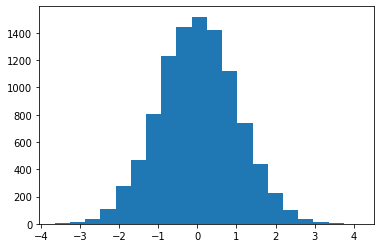

In [15]:
loss = MMDLoss()
x = X.get_total_increments()
sig = X.integrated_variance()
#loss(tf.constant(x), tf.constant(sig))
import matplotlib.pyplot as plt
plt.hist(x/np.sqrt(sig), bins=20)
plt.show()

In [24]:
model = FFNetwork(n_layers=3, h_dims=32)

[autoreload of src.model failed: Traceback (most recent call last):
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 342, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new,

TypeError: super(type, obj): obj must be an instance or subtype of type

In [115]:
model = FFNetwork(n_layers =1)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: id=167, shape=(1, 1), dtype=float32, numpy=array([[0.19677146]], dtype=float32)>

In [102]:
sample_moments

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8.8739133e-04, 9.9823749e-01, 8.6469101e-03, 2.9555957e+00,
       1.2161723e-01, 1.4499716e+01, 1.7317578e+00, 9.8569351e+01,
       2.6073780e+01, 8.4694281e+02], dtype=float32)>

In [136]:
loss1 = MomentLoss(weights = None, degree=10)
loss2 = MomentLoss(weights = 'exponential', degree=10)
loss3 = MomentLoss(weights = 'factorial', degree=10)

In [137]:
print(loss1(inc, int_var))
print(loss2(inc, int_var))
print(loss3(inc, int_var))

tf.Tensor(1033.9674, shape=(), dtype=float32)
tf.Tensor(0.05526517, shape=(), dtype=float32)
tf.Tensor(0.00091985625, shape=(), dtype=float32)


In [171]:
loss = MMDLoss(kernel = 'rbf', length_scale=2.0)

In [172]:
loss.kernel(1.0, 2.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7788008>